C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


ROUND 1
Food produced          : 21
Population             : Hawks-> 1, Doves-> 99
Dead hawks             : 0
Dead doves             : 0
Hawk babies            : 0
Dove babies            : 0
Hawks                  : 1.00%
Doves                  : 99.00%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 2
Food produced          : 26
Population             : Hawks-> 1, Doves-> 99
Dead hawks             : 0
Dead doves             : 0
Hawk babies            : 0
Dove babies            : 0
Hawks                  : 1.00%
Doves                  : 99.00%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 3
Food produced          : 20
Population             : Hawks-> 1, Doves-> 99
Dead hawks             : 0
Dead doves             : 0
Hawk babies            : 0
Dove babies            : 0
Hawks                  : 1.00%
Doves                  : 99.00%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 4
Food produced          : 2

ROUND 30
Food produced          : 28
Population             : Hawks-> 271, Doves-> 587
Dead hawks             : 7
Dead doves             : 0
Hawk babies            : 180
Dove babies            : 34
Hawks                  : 31.59%
Doves                  : 68.41%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 31
Food produced          : 29
Population             : Hawks-> 229, Doves-> 621
Dead hawks             : 42
Dead doves             : 0
Hawk babies            : 0
Dove babies            : 34
Hawks                  : 26.94%
Doves                  : 73.06%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 32
Food produced          : 27
Population             : Hawks-> 198, Doves-> 663
Dead hawks             : 31
Dead doves             : 0
Hawk babies            : 0
Dove babies            : 42
Hawks                  : 23.00%
Doves                  : 77.00%
----
Round Processing time  : 00:00
Elapsed time           : 00:00

ROUND 33
Foo

ROUND 55
Food produced          : 21
Population             : Hawks-> 1250, Doves-> 2006
Dead hawks             : 281
Dead doves             : 1
Hawk babies            : 8
Dove babies            : 38
Hawks                  : 38.39%
Doves                  : 61.61%
----
Round Processing time  : 00:01
Elapsed time           : 00:11

ROUND 56
Food produced          : 28
Population             : Hawks-> 1011, Doves-> 2093
Dead hawks             : 239
Dead doves             : 1
Hawk babies            : 0
Dove babies            : 88
Hawks                  : 32.57%
Doves                  : 67.43%
----
Round Processing time  : 00:01
Elapsed time           : 00:12

ROUND 57
Food produced          : 23
Population             : Hawks-> 843, Doves-> 2170
Dead hawks             : 168
Dead doves             : 1
Hawk babies            : 0
Dove babies            : 78
Hawks                  : 27.98%
Doves                  : 72.02%
----
Round Processing time  : 00:01
Elapsed time           : 00:13

ROUND

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


NameError: name 'show' is not defined

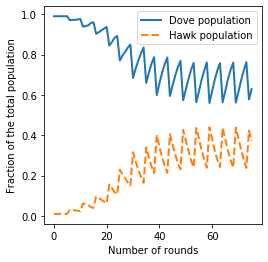

In [9]:
#!/usr/bin/python
from random import choice, randint
import time

STARTING_DOVES = 99
STARTING_HAWKS = 1
STARTING_POPULATION = STARTING_HAWKS + STARTING_DOVES

ROUNDS = 75
STARTING_ENERGY = 100;

MIN_FOOD_PER_ROUND = 20
MAX_FOOD_PER_ROUND = 30

ENERGY_REQUIRED_FOR_REPRODUCTION = 250
ENERGY_LOSS_PER_ROUND = 2
ENERGY_COST_OF_BLUFFING = 10
ENERGY_LOSS_FROM_FIGHTING = 500
ENERGY_REQUIRED_FOR_LIVING = 20

STATUS_ACTIVE = "active"
STATUS_ASLEEP = "asleep"

TYPE_HAWK = "hawk"
TYPE_DOVE = "dove"

agents = []

# Graph stuff
graph_hawk_points = []
graph_dove_points = []

# Profiling


class Agent:
        id = 0
        agent_type = None
        status = STATUS_ACTIVE
        energy = STARTING_ENERGY


def main():
        init()

        current_round = 1
        death_count = 0
        dead_hawks  = 0
        dead_doves  = 0
        breed_count = 0
        main_tic = time.clock()

        while current_round <= ROUNDS and len(agents) > 2:
                tic = time.clock()
                awakenAgents()
                food = getFood()

                # This could be optimized further by creating a list every time
                # that only has active agents, so it isn't iterating over entire list every time
                while True:
                        agent, nemesis = getRandomAgents()
                        if agent is None or nemesis is None: break
                        compete(agent, nemesis, food)

                # Energy cost of 'living'
                for agent in agents:
                        agent.energy += ENERGY_LOSS_PER_ROUND

                round_dead_hawks, round_dead_doves = cull()
                round_hawk_babies, round_dove_babies = breed()
                death_count += (round_dead_hawks + round_dead_doves)
                breed_count += (round_hawk_babies + round_dove_babies)


                toc = time.clock()

                print("ROUND %d" % current_round)
                print("Food produced          : %d" % food)
                print("Population             : Hawks-> %d, Doves-> %d" % (getAgentCountByType(TYPE_HAWK), getAgentCountByType(TYPE_DOVE)))
                print("Dead hawks             : %d" % round_dead_hawks)
                print("Dead doves             : %d" % round_dead_doves)
                print("Hawk babies            : %s" % round_hawk_babies)
                print("Dove babies            : %s" % round_dove_babies)
                print("Hawks                  : %s" % getPercByType(TYPE_HAWK))
                print("Doves                  : %s" % getPercByType(TYPE_DOVE))
                print("----")
                print("Round Processing time  : %s" % getTimeFormatted(toc - tic))
                print("Elapsed time           : %s\n" % getTimeFormatted(time.clock() - main_tic))

                # Plot
                hawk=getAgentCountByType(TYPE_HAWK)
                dove=getAgentCountByType(TYPE_DOVE)
                graph_hawk_points.append(hawk/(hawk+dove))
                graph_dove_points.append(dove/(hawk+dove))

                current_round += 1


        main_toc = time.clock()

        print("=============================================================")
        print("Total dead agents      : %d" % death_count)
        print("Total breeding agents  : %d" % breed_count)
        print("Total rounds completed : %d" % (current_round - 1))
        print("Total population size  : %s" % len(agents))
        print("Hawks                  : %s" % getPercByType(TYPE_HAWK))
        print("Doves                  : %s" % getPercByType(TYPE_DOVE))
        print("Processing time        : %s" % getTimeFormatted(main_toc - main_tic))
        print("=============================================================")


def init():

        for x in range(0,STARTING_DOVES):
                a = Agent()
                a.agent_type = TYPE_DOVE
                agents.append(a)

        for x2 in range(0,STARTING_HAWKS):
                a2 = Agent()
                a2.agent_type = TYPE_HAWK
                agents.append(a2)


def getAvgFromList(list):
        return float( sum(list) / len(list) )


def getTimeFormatted(seconds):
        m, s = divmod(seconds, 60)
        return "%02d:%02d" % (m, s)     


def getFood():
        return randint(MIN_FOOD_PER_ROUND, MAX_FOOD_PER_ROUND)


def getPercByType(agent_type):
        perc = float(getAgentCountByType(agent_type)) / float(len(agents))
        return '{percent:.2%}'.format(percent=perc)


def getAliveAgentsCount():
        return getAgentCountByStatus(STATUS_ACTIVE) + getAgentCountByStatus(STATUS_ASLEEP)


def getRandomAgents():
        nemesis = None
        active_agents = list(generateAgentsByStatus(STATUS_ACTIVE))
        if len(active_agents) < 2:
                return None, None
        max_index = len(active_agents) - 1
        agent = active_agents[ randint(0, max_index) ]
        while nemesis is None:
                n = active_agents[ randint(0, max_index) ]
                if n is not agent:
                        nemesis = n

        return agent, nemesis


def awakenAgents():
        for agent in agents:
                agent.status = STATUS_ACTIVE


def generateAgentsByType(agent_type):
        for agent in agents:
                if agent.agent_type == agent_type:
                        yield agent


def generateAgentsByStatus(status):
        for agent in agents:
                if agent.status == status:
                        yield agent


def getEnergyFromFood(food):
        return food # 1 to 1


def getAgentCountByStatus(status):
        count = len( list(generateAgentsByStatus(status)) )
        return count


def getAgentCountByType(agent_type):
        return len( list(generateAgentsByType(agent_type)) )


def compete(agent, nemesis, food):
        winner = choice([agent, nemesis])
        loser = agent if (winner is nemesis) else nemesis

        if agent.agent_type == TYPE_HAWK and nemesis.agent_type == TYPE_HAWK:
                # Random winner chosen, loser gets injured, winner gets food
                winner.energy += getEnergyFromFood(food)
                loser.energy  -= ENERGY_LOSS_FROM_FIGHTING

        if agent.agent_type == TYPE_HAWK and nemesis.agent_type == TYPE_DOVE:
                agent.energy += getEnergyFromFood(food)
                nemesis.energy -= ENERGY_COST_OF_BLUFFING

        if agent.agent_type == TYPE_DOVE and nemesis.agent_type == TYPE_HAWK:
                nemesis.energy += getEnergyFromFood(food)
                agent.energy -= ENERGY_COST_OF_BLUFFING

        if agent.agent_type == TYPE_DOVE and nemesis.agent_type == TYPE_DOVE:
                winner.energy += getEnergyFromFood(food)
                loser.energy  -= ENERGY_COST_OF_BLUFFING

        nemesis.status = agent.status = STATUS_ASLEEP


def getNewAgent(agent_type, starting_energy=STARTING_ENERGY, status=STATUS_ASLEEP):
        agent = Agent()
        agent.agent_type = agent_type
        agent.status = status
        agent.energy = starting_energy
        return agent


def breed():
        """
        If agent can breed, it halves its energy and produces 
        two babies with starting energy (parent energy / 2)
        """
        hawk_babies = 0
        dove_babies = 0
        for agent in agents:
                if agent.energy > ENERGY_REQUIRED_FOR_REPRODUCTION:
                        baby_agent_a = getNewAgent(agent.agent_type, (agent.energy/2))
                        baby_agent_b = getNewAgent(agent.agent_type, (agent.energy/2))

                        agents.append(baby_agent_b)
                        agents.append(baby_agent_a)

                        agent.energy /= 2

                        if agent.agent_type == TYPE_DOVE: dove_babies += 2
                        if agent.agent_type == TYPE_HAWK: hawk_babies += 2


        return hawk_babies, dove_babies


def cull():

        dead_hawks = 0
        dead_doves = 0
        for index, agent in enumerate(agents):
                if agent.energy < ENERGY_REQUIRED_FOR_LIVING:
                        if agent.agent_type == TYPE_DOVE: dead_doves += 1
                        if agent.agent_type == TYPE_HAWK: dead_hawks += 1
                        del agents[index]


        return dead_hawks, dead_doves


main()

import matplotlib.pyplot as plt
import numpy as np
X=range(0,ROUNDS+1)
fig = plt.figure()
ax = fig.add_subplot()


plt.plot(X,np.append([0.99],graph_dove_points),linewidth=2)
plt.plot(X,np.append([0.01],graph_hawk_points), linestyle='dashed',linewidth=2)

plt.legend(["Dove population","Hawk population"],loc='best')
plt.xlabel("Number of rounds")
plt.ylabel("Fraction of the total population")
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.savefig('Hvd1.jpeg',dpi=1200)

show()


In [36]:
pwd


'C:\\Users\\Administrator'